In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from dateutil import parser
import isodate
import cufflinks as cf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Sidemen Channels Dataset

In [4]:
df = pd.read_csv('sdmn_channels.csv')
df.head()

,channel_name,description,publishedAt,total_views,subscribers,total_videos,playlists,publishedAtTime,publishedAtDate
0,Beh2inga,"Welcome to the Beh2inga channel, now a museum ...",2013-08-19T23:30:49Z,291680738,1960000,2319,UUbzZFTHge5zk2yebSiWRZRg,23:30:49,2013-08-19
1,KSI,For any inquiries contact Mams Taylor – Mams@p...,2009-07-25T01:11:42Z,5927506140,24000000,1245,UUVtFOytbRpEvzLjvqGG5gxQ,01:11:42,2009-07-25
2,W2S,COOL VIDEOS,2012-07-26T13:57:46Z,4749715321,16300000,653,UUjtLOfx1yt1NlnFIDyAX3Ug,13:57:46,2012-07-26
3,TBJZL,Games + Vlogs,2011-11-16T00:27:12Z,517118584,4860000,890,UUfNWN9s_s8kRTCadk04WWJA,00:27:12,2011-11-16
4,VikkstarPlays,I'm Vikkstar and this is my Third channel for ...,2013-03-01T17:13:28Z,141328154,1100000,673,UUBXG9Hl9f94Zfoceh1a8otQ,17:13:28,2013-03-01


In [5]:
import parse
df['publishedAtTime'] = df.publishedAt.apply(lambda x:str(x)[11:-1])
df['publishedAtDate'] = df.publishedAt.apply(lambda x:str(x)[:10])

In [6]:
df.to_csv('sdmn_channels.csv',index=False)

In [7]:
df.head()

,channel_name,description,publishedAt,total_views,subscribers,total_videos,playlists,publishedAtTime,publishedAtDate
0,Beh2inga,"Welcome to the Beh2inga channel, now a museum ...",2013-08-19T23:30:49Z,291680738,1960000,2319,UUbzZFTHge5zk2yebSiWRZRg,23:30:49,2013-08-19
1,KSI,For any inquiries contact Mams Taylor – Mams@p...,2009-07-25T01:11:42Z,5927506140,24000000,1245,UUVtFOytbRpEvzLjvqGG5gxQ,01:11:42,2009-07-25
2,W2S,COOL VIDEOS,2012-07-26T13:57:46Z,4749715321,16300000,653,UUjtLOfx1yt1NlnFIDyAX3Ug,13:57:46,2012-07-26
3,TBJZL,Games + Vlogs,2011-11-16T00:27:12Z,517118584,4860000,890,UUfNWN9s_s8kRTCadk04WWJA,00:27:12,2011-11-16
4,VikkstarPlays,I'm Vikkstar and this is my Third channel for ...,2013-03-01T17:13:28Z,141328154,1100000,673,UUBXG9Hl9f94Zfoceh1a8otQ,17:13:28,2013-03-01


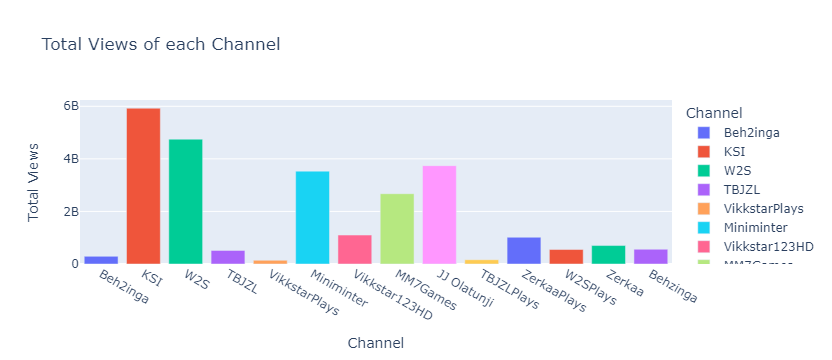

In [8]:
px.bar(df, x='channel_name', y='total_views', color='channel_name', title='Total Views of each Channel',
       labels={'total_views': 'Total Views', 'channel_name': 'Channel'})

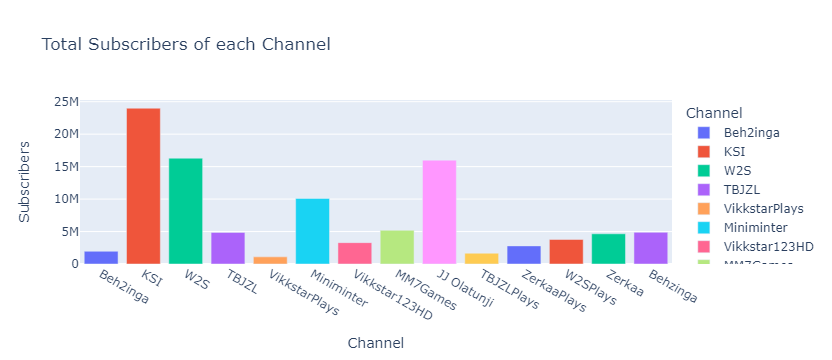

In [9]:
px.bar(df, x='channel_name', y='subscribers', color='channel_name', title='Total Subscribers of each Channel',
       labels={'subscribers': 'Subscribers', 'channel_name': 'Channel'})

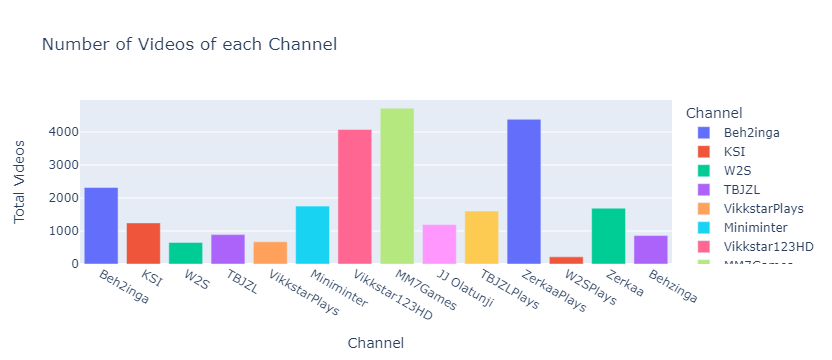

In [10]:
px.bar(df, x='channel_name', y='total_videos', color='channel_name', title='Number of Videos of each Channel',
       labels={'total_videos': 'Total Videos', 'channel_name': 'Channel'})

In [ ]:
anchos = [0.2] * 6
fig = go.Figure()
cols = ['total_views','subscribers','total_videos']
for i in cols:
    fig.add_trace(go.Bar(x = df.channel_name, 
                     y = df[i],
                     width = anchos, name = i,
                     text = df[i]))

fig.update_layout(title="Channel views, subscribers, and number of videos",barmode='group',title_font_size=20,width=800,height=600)

fig.update_layout(legend=go.layout.Legend(x=1,y=1,traceorder='normal',font=dict(family="Oswald",size= 10, color = "black")))

fig.update_traces(texttemplate='%{text:.2f}',textposition='outside',textfont=dict(size=30, family='Oswald', color='black'))

fig.update_xaxes(title_text = 'Channel Name',title_font=dict(size=20,family='Oswald',color='black'), 
           tickfont=dict(family='Oswald', color='black',size=10))

fig.update_yaxes(title_text = "Sales", title_font=dict(size=20,family='Oswald',color='black'), 
           tickfont=dict(family='Oswald', color='black',size=10))         
# fig.write_image(path + "figclust1.png")
fig.show()

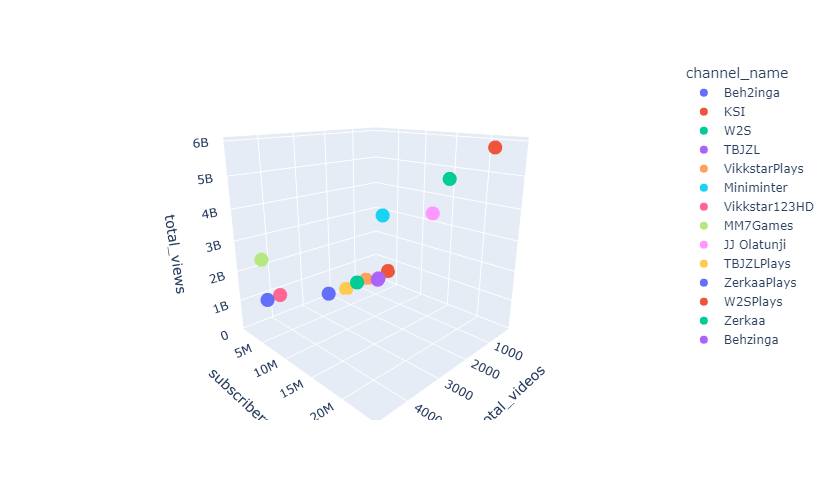

In [14]:
fig = px.scatter_3d(df, x='total_videos', y='subscribers', z='total_views', color='channel_name',width=800, height=500)
fig.show()

In [ ]:
# Correlation of views with subscriber count, and number of videos

In [15]:
views_subs_corr = df.total_views.corr(df.subscribers)
print('Correlation between total views and subscriber count:',views_subs_corr)
print('Positive Correlation')

views_videos_corr = df.total_views.corr(df.total_videos)
print('Correlation between total views and number of videos:',views_videos_corr)
print('No Correlation')

Correlation between total views and subscriber count: 0.94794262378715
Positive Correlation
Correlation between total views and number of videos: -0.059336537347826936
No Correlation


In [69]:
vdf = pd.read_csv('video_details.csv')

In [70]:
vdf.head()
vdf.columns

Index(['channel', 'video_id', 'title', 'description', 'categoryId',
       'publishedAt', 'duration', 'tags', 'likes', 'views', 'comments',
       'pushblishDayName', 'durationSecs', 'tagsCount', 'likeRatio',
       'commentRatio', 'titleLength'],
      dtype='object')

In [71]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26287 entries, 0 to 26286
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channel           26287 non-null  object 
 1   video_id          26287 non-null  object 
 2   title             26287 non-null  object 
 3   description       26284 non-null  object 
 4   categoryId        26287 non-null  int64  
 5   publishedAt       26287 non-null  object 
 6   duration          26287 non-null  object 
 7   tags              25627 non-null  object 
 8   likes             26258 non-null  float64
 9   views             26287 non-null  int64  
 10  comments          26219 non-null  float64
 11  pushblishDayName  26287 non-null  object 
 12  durationSecs      26287 non-null  float64
 13  tagsCount         26287 non-null  int64  
 14  likeRatio         26256 non-null  float64
 15  commentRatio      26207 non-null  float64
 16  titleLength       26287 non-null  int64 

In [ ]:
# Create publish day (in the week) column
vdf['publishedAt'] =  vdf['publishedAt'].apply(lambda x: parser.parse(x)) 
vdf['publishedAt'] = pd.to_datetime(vdf['publishedAt'], errors='coerce')
vdf['pushblishDayName'] = vdf['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [ ]:
# convert duration to seconds
vdf['durationSecs'] = vdf['duration'].apply(lambda x: isodate.parse_duration(x))
vdf['durationSecs'] = vdf['durationSecs'].astype('timedelta64[s]')

In [ ]:
# Add number of tags
vdf['tagsCount'] = vdf['tags'].apply(lambda x: 0 if x is None else len(str(x)))

In [ ]:
# Comments and likes per 1000 view ratio
vdf['likeRatio'] = vdf['likes']/ vdf['views'] * 1000
vdf['commentRatio'] = vdf['comments']/ vdf['views'] * 1000

In [ ]:
# Title character length
vdf['titleLength'] = vdf['title'].apply(lambda x: len(x))

In [ ]:
vdf.to_csv('video_details.csv',index=False)

In [ ]:
vdf = pd.read_csv('video_details.csv')
vdf.head()

In [ ]:
fig = go.Figure()

channels = list(vdf.channel.unique())
# channels
for channel in channels:
    fig.add_trace(go.Violin(x=vdf['channel'][vdf['channel'] == channel],
                            y=vdf['views'][vdf['channel'] == channel],
                            name=channel,meanline_visible=True))

fig.update_layout(width=800,height=500)
fig.show()

In [63]:
df1 = vdf[['channel','publishedAt','durationSecs','likes','views','comments','pushblishDayName']]

In [64]:
df1.head()

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName
0,Beh2inga,2021-05-25 18:37:38+00:00,1698.0,9652.0,218394,565.0,Tuesday
1,Beh2inga,2021-02-28 22:00:37+00:00,2723.0,22266.0,461249,1739.0,Sunday
2,Beh2inga,2021-02-25 22:36:59+00:00,2890.0,24067.0,362479,1414.0,Thursday
3,Beh2inga,2021-02-23 16:58:01+00:00,3128.0,22462.0,424584,1361.0,Tuesday
4,Beh2inga,2021-02-20 21:02:42+00:00,3065.0,27373.0,450813,1858.0,Saturday


In [213]:
df1.to_csv('channel_metrics.csv',index=False)

In [211]:
df1 = pd.read_csv('channel_metrics.csv')

In [212]:
df1

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName,year,month,year_month
0,Beh2inga,2013-10-26 16:34:31+00:00,374.0,706.0,48849,58.0,Saturday,2013,10,2013-10
1,Beh2inga,2013-10-27 17:13:17+00:00,312.0,224.0,14849,5.0,Sunday,2013,10,2013-10
2,Beh2inga,2013-10-28 17:11:45+00:00,346.0,181.0,11744,12.0,Monday,2013,10,2013-10
3,Beh2inga,2013-10-29 17:10:49+00:00,368.0,171.0,11197,11.0,Tuesday,2013,10,2013-10
4,Beh2inga,2013-10-30 17:33:14+00:00,349.0,156.0,9908,9.0,Wednesday,2013,10,2013-10
...,...,...,...,...,...,...,...,...,...,...
26282,ZerkaaPlays,2022-09-19 19:00:30+00:00,1012.0,5847.0,158191,117.0,Monday,2022,9,2022-09
26283,ZerkaaPlays,2022-09-20 19:00:12+00:00,546.0,8283.0,115927,274.0,Tuesday,2022,9,2022-09
26284,ZerkaaPlays,2022-09-21 19:00:02+00:00,835.0,4556.0,115179,54.0,Wednesday,2022,9,2022-09
26285,ZerkaaPlays,2022-09-22 19:30:02+00:00,877.0,6043.0,148779,97.0,Thursday,2022,9,2022-09


In [172]:
ksi = df1[df1.channel=='KSI']
ksi.shape

(1244, 10)

In [171]:
df1.sort_values(['channel','publishedAt'],inplace=True)
df1.reset_index(drop=True,inplace=True)

In [68]:
df1.head()

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName
0,Beh2inga,2013-10-26 16:34:31+00:00,374.0,706.0,48849,58.0,Saturday
1,Beh2inga,2013-10-27 17:13:17+00:00,312.0,224.0,14849,5.0,Sunday
2,Beh2inga,2013-10-28 17:11:45+00:00,346.0,181.0,11744,12.0,Monday
3,Beh2inga,2013-10-29 17:10:49+00:00,368.0,171.0,11197,11.0,Tuesday
4,Beh2inga,2013-10-30 17:33:14+00:00,349.0,156.0,9908,9.0,Wednesday


In [69]:
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'], errors='coerce')
df1['year'] = pd.DatetimeIndex(df1['publishedAt']).year
df1['month'] = pd.DatetimeIndex(df1['publishedAt']).month
df1['year_month'] = df1['publishedAt'].dt.to_period('M')

In [70]:
df1.to_csv('channel_metrics.csv',index=False)
df1.head()

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName,year,month,year_month
0,Beh2inga,2013-10-26 16:34:31+00:00,374.0,706.0,48849,58.0,Saturday,2013,10,2013-10
1,Beh2inga,2013-10-27 17:13:17+00:00,312.0,224.0,14849,5.0,Sunday,2013,10,2013-10
2,Beh2inga,2013-10-28 17:11:45+00:00,346.0,181.0,11744,12.0,Monday,2013,10,2013-10
3,Beh2inga,2013-10-29 17:10:49+00:00,368.0,171.0,11197,11.0,Tuesday,2013,10,2013-10
4,Beh2inga,2013-10-30 17:33:14+00:00,349.0,156.0,9908,9.0,Wednesday,2013,10,2013-10


In [71]:
df_yearly_views = df1.groupby(['channel','year'])['views'].sum()
df_yearly_views = df_yearly_views.copy().reset_index()

In [ ]:
df_yearly_views

In [72]:
x = df1.groupby(['year','channel'])['views'].sum()

In [73]:
x = x.copy().reset_index()
x

,year,channel,views
0,2009,Zerkaa,5246471
1,2010,KSI,1757899
2,2010,Zerkaa,41331503
3,2011,JJ Olatunji,1992427
4,2011,KSI,157600838
...,...,...,...
145,2022,TBJZL,8717022
146,2022,TBJZLPlays,2630983
147,2022,Vikkstar123HD,572184
148,2022,W2SPlays,10468751


In [37]:
cols = list(x.channel.unique())
c = []
df_yearly_views = pd.DataFrame(columns=['year','channel','views'])
y = []
ch = []
v = []

In [38]:
for i in list(x.channel):
    if len(c) < len(cols):
        if i not in c:
            u = x[x.channel==i]
            df_yearly_views = df_yearly_views.append(u)
            c.append(i)
    else:
        break

In [44]:
df_yearly_views = df_yearly_views[["channel","year","views"]]

In [45]:
df_yearly_views.reset_index(drop=True,inplace=True)
df_yearly_views

,channel,year,views
0,Zerkaa,2009,5246471
1,Zerkaa,2010,41331503
2,Zerkaa,2011,17459802
3,Zerkaa,2012,19917747
4,Zerkaa,2013,9622736
...,...,...,...
145,W2SPlays,2016,9011576
146,W2SPlays,2019,62110215
147,W2SPlays,2020,346746028
148,W2SPlays,2021,80503432


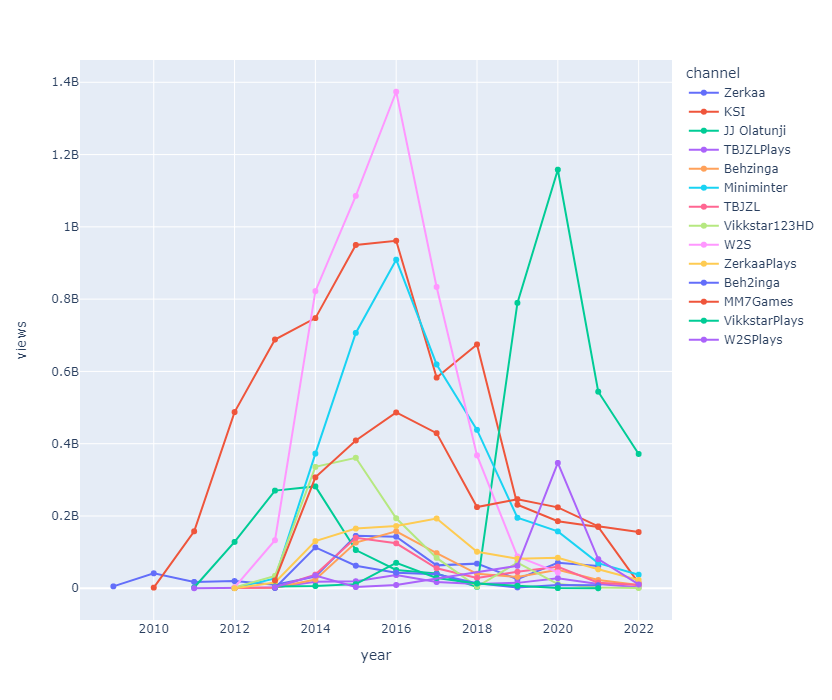

In [40]:
fig = px.line(df_yearly_views, x='year', y='views', color='channel', markers=True,width=800,height=700)
fig.show()

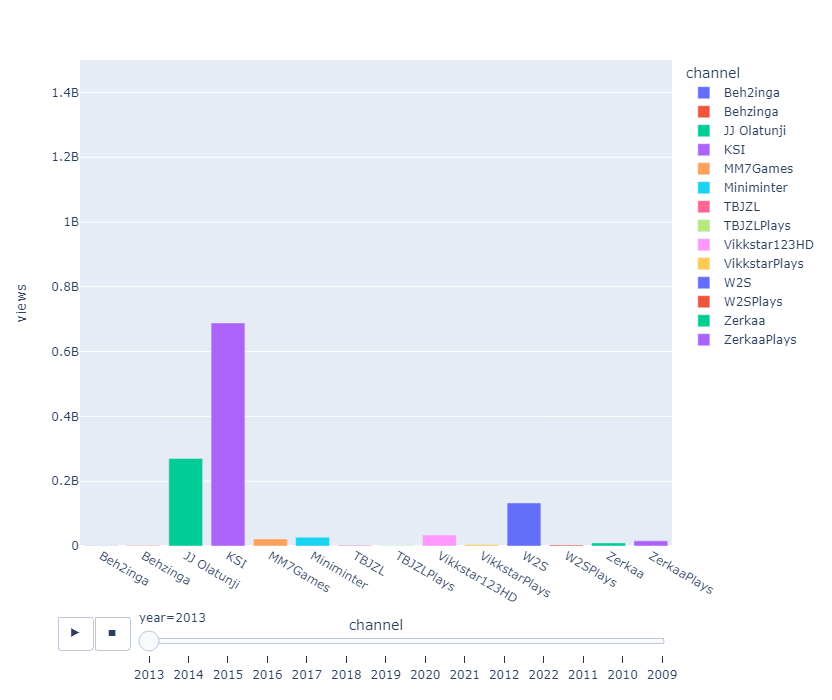

In [52]:
fig = px.bar(df_yearly_views, x='channel', y='views', color='channel',animation_frame="year", animation_group="channel",range_y=[0,1500000000],width=800,height=700)
fig.show()

In [62]:
# df_yearly_views[df_yearly_views.channel=='KSI'].views
df_yearly_views.channel.unique()

array(['Beh2inga', 'Behzinga', 'JJ Olatunji', 'KSI', 'MM7Games',
       'Miniminter', 'TBJZL', 'TBJZLPlays', 'Vikkstar123HD',
       'VikkstarPlays', 'W2S', 'W2SPlays', 'Zerkaa', 'ZerkaaPlays'],
      dtype=object)

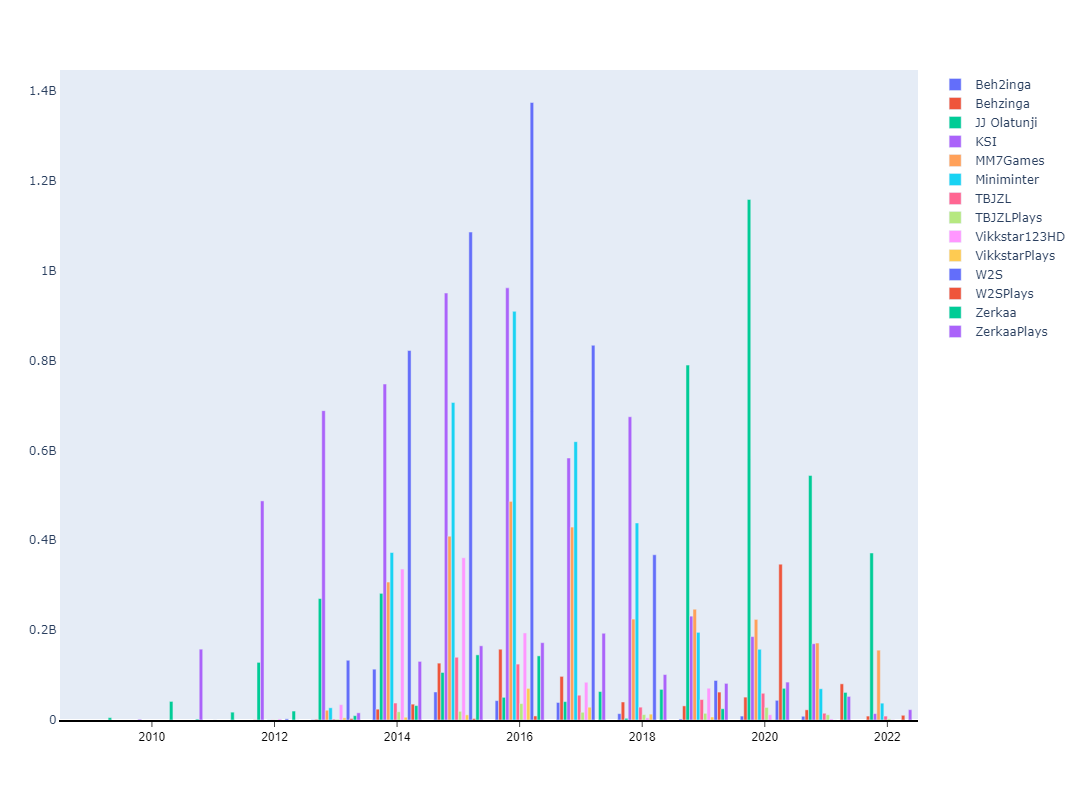

In [61]:
# Create a figure to which I'll add plots
fig = go.Figure()

for i in df_yearly_views.channel.unique():
    fig.add_trace(go.Bar(x=df_yearly_views[df_yearly_views.channel==i].year, y=df_yearly_views[df_yearly_views.channel==i].views,name=i))

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(showline=True,showgrid=False,showticklabels=True,linecolor='rgb(0,0,0)',
            linewidth=2,ticks='outside',tickfont=dict(family='Arial',size=12,color='rgb(5,5,5)')),
    # Turn off everything on y axis
    yaxis=dict(showgrid=False,zeroline=True,showline=True,showticklabels=True),
    autosize=True,width=1000,height=800,
    margin=dict(autoexpand=True,l=60,r=20,t=70))

fig.show()

In [ ]:
# Preffered Upload Day

In [210]:
df1.to_csv('channel_metrics.csv',index=False)

In [74]:
df1.head()

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName,year,month,year_month
0,Beh2inga,2013-10-26 16:34:31+00:00,374.0,706.0,48849,58.0,Saturday,2013,10,2013-10
1,Beh2inga,2013-10-27 17:13:17+00:00,312.0,224.0,14849,5.0,Sunday,2013,10,2013-10
2,Beh2inga,2013-10-28 17:11:45+00:00,346.0,181.0,11744,12.0,Monday,2013,10,2013-10
3,Beh2inga,2013-10-29 17:10:49+00:00,368.0,171.0,11197,11.0,Tuesday,2013,10,2013-10
4,Beh2inga,2013-10-30 17:33:14+00:00,349.0,156.0,9908,9.0,Wednesday,2013,10,2013-10


In [ ]:
# KSI for example

In [175]:
df_day = df1[df1.channel=='KSI']

In [177]:
df_day.shape

(1244, 10)

In [178]:
df_day.head()

,channel,publishedAt,durationSecs,likes,views,comments,pushblishDayName,year,month,year_month
4379,KSI,2010-02-01 07:35:21+00:00,31.0,25608.0,1090515,6554.0,Monday,2010,2,2010-02
4380,KSI,2010-03-02 21:44:40+00:00,135.0,18897.0,667384,2193.0,Tuesday,2010,3,2010-03
4381,KSI,2011-02-09 20:26:31+00:00,36.0,15178.0,1307082,1447.0,Wednesday,2011,2,2011-02
4382,KSI,2011-02-11 22:12:32+00:00,46.0,2990.0,334165,304.0,Friday,2011,2,2011-02
4383,KSI,2011-02-11 22:20:12+00:00,72.0,2591.0,361166,265.0,Friday,2011,2,2011-02


In [159]:
# df_day_group = df_day.groupby(['channel','pushblishDayName'])['pushblishDayName'].count()
df_day_group = df_day.groupby(['year','pushblishDayName'])['views'].sum()
df_day_group = df_day_group.copy().reset_index()

In [160]:
df_day_group

,year,pushblishDayName,views
0,2010,Monday,1090515
1,2010,Tuesday,667384
2,2011,Friday,40922853
3,2011,Monday,21811402
4,2011,Saturday,13381206
...,...,...,...
75,2022,Friday,8518601
76,2022,Monday,995242
77,2022,Sunday,2300265
78,2022,Thursday,1895019


In [161]:
count_val = list(df_day_group['pushblishDayName'].value_counts())
count_val

[13, 13, 12, 11, 11, 10, 10]

In [162]:
day = list(df_day_group['pushblishDayName'].value_counts().index)
day
day_counts =  dict(zip(day, count_val))
day_counts

{'Monday': 13,
 'Tuesday': 13,
 'Friday': 12,
 'Saturday': 11,
 'Sunday': 11,
 'Thursday': 10,
 'Wednesday': 10}

In [131]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [195]:
df_day = df1

In [196]:
df_day_group = df_day.groupby(['channel','pushblishDayName'])['views'].sum()
df_day_group = df_day_group.copy().reset_index()

In [198]:
df_day_group 

,channel,pushblishDayName,views
0,Beh2inga,Friday,38578022
1,Beh2inga,Monday,45943300
2,Beh2inga,Saturday,40976945
3,Beh2inga,Sunday,37824994
4,Beh2inga,Thursday,41664993
...,...,...,...
93,ZerkaaPlays,Saturday,153545157
94,ZerkaaPlays,Sunday,140027436
95,ZerkaaPlays,Thursday,149717574
96,ZerkaaPlays,Tuesday,145780533


In [201]:
df_day.pushblishDayName.value_counts()

Monday       3844
Saturday     3842
Thursday     3810
Wednesday    3794
Tuesday      3719
Friday       3689
Sunday       3589
Name: pushblishDayName, dtype: int64

In [204]:
df_day_group.channel.unique()

array(['Beh2inga', 'Behzinga', 'JJ Olatunji', 'KSI', 'MM7Games',
       'Miniminter', 'TBJZL', 'TBJZLPlays', 'Vikkstar123HD',
       'VikkstarPlays', 'W2S', 'W2SPlays', 'Zerkaa', 'ZerkaaPlays'],
      dtype=object)

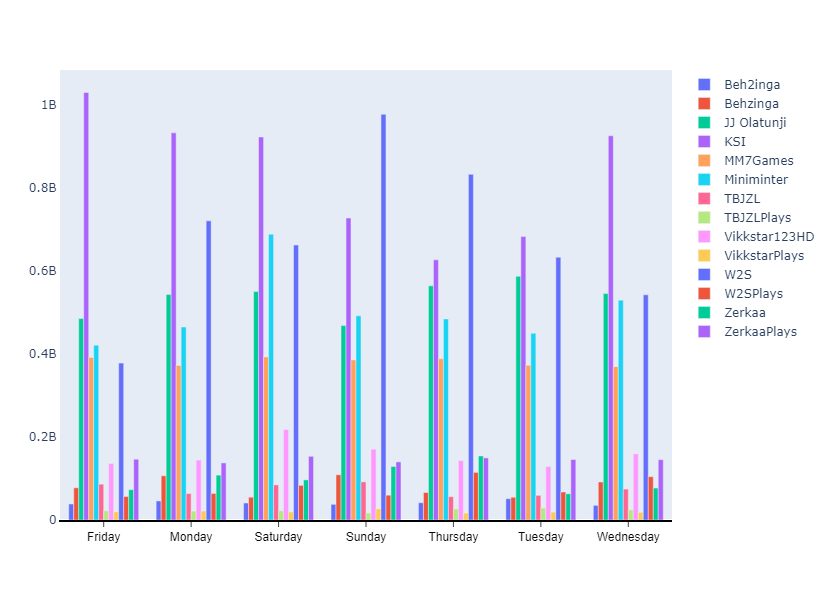

In [205]:
# Create a figure to which I'll add plots
fig = go.Figure()

for i in df_day_group.channel.unique():
    fig.add_trace(go.Bar(x=df_day_group[df_day_group.channel==i].pushblishDayName, y=df_day_group[df_day_group.channel==i].views,name=i))

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(showline=True,showgrid=False,showticklabels=True,linecolor='rgb(0,0,0)',
            linewidth=2,ticks='outside',tickfont=dict(family='Arial',size=12,color='rgb(5,5,5)')),
    # Turn off everything on y axis
    yaxis=dict(showgrid=False,zeroline=True,showline=True,showticklabels=True),
    autosize=True,width=800,height=600,
    margin=dict(autoexpand=True,l=60,r=20,t=70))

fig.show()

In [182]:
df_duration_views = df1[['channel','year','durationSecs','views']]

In [183]:
df_duration_views.head()

,channel,year,durationSecs,views
0,Beh2inga,2013,374.0,48849
1,Beh2inga,2013,312.0,14849
2,Beh2inga,2013,346.0,11744
3,Beh2inga,2013,368.0,11197
4,Beh2inga,2013,349.0,9908


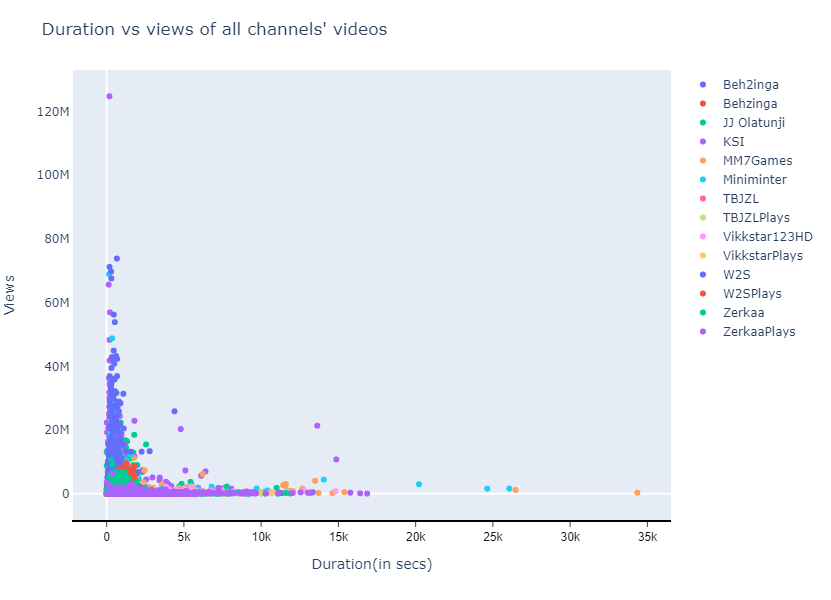

In [207]:
# Create a figure to which I'll add plots
fig = go.Figure()

for i in df_duration_views.channel.unique():
    fig.add_trace(go.Scatter(x=df_duration_views[df_duration_views.channel==i].durationSecs, 
                             y=df_duration_views[df_duration_views.channel==i].views,mode='markers',name=i))

# Go crazy styling the figure
fig.update_layout(title="Duration vs views of all channels' videos",xaxis_title='Duration(in secs)', yaxis_title='Views'
    # Shows gray line without grid, styling fonts, linewidths and more
    ,xaxis=dict(showline=True,showgrid=False,showticklabels=True,linecolor='rgb(0,0,0)',
            linewidth=2,ticks='outside',tickfont=dict(family='Arial',size=12,color='rgb(5,5,5)')),
    # Turn off everything on y axis
    yaxis=dict(showgrid=False,zeroline=True,showline=True,showticklabels=True),width=800,height=600,
    margin=dict(autoexpand=True,l=60,r=20,t=70))

fig.show()